In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

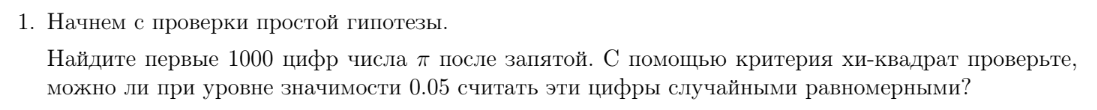

In [8]:
#статические данные
from mpmath import mp

#первые 1000 символов числа после запятой
mp.dps = 1001  # set number of digits
data1 = mp.pi
data1 = str(data1)
data = []
for i in range(1, len(data1)):
    if data1[i] != '.':
        data.append(int(data1[i]))
        
#вероятность ошибки первого рода
a = 0.05

In [9]:
freq = [0 for i in range(10)]

for i in data:
    freq[int(i)] += (0.001)

if sc.stats.chisquare(freq, [0.1 for i in range(10)]).pvalue > (1 - a):
    print("Uniform")
else:
    print("Not uniform")

Uniform


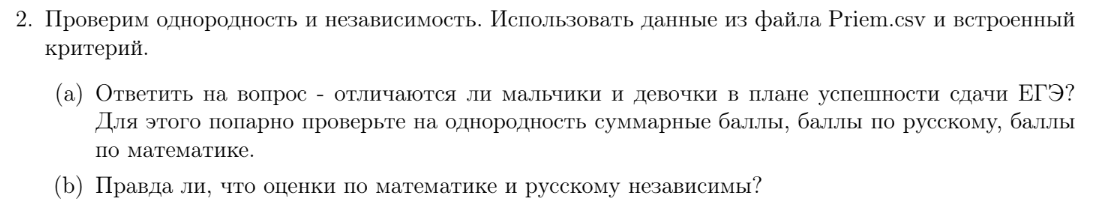

In [27]:
data = pd.read_csv("Priem.csv")
data.head()

#массивы данных и размер выборки
def criteria(m, w, quantile_num):
    
    #объединяем данные
    data = np.concatenate((m, w))

    quantiles = np.nanquantile(data, [i/quantile_num for i in range(quantile_num+1)])
    
    count_m = np.zeros(quantile_num)
    count_w = np.zeros(quantile_num)
    
    for i in range(len(m)):
        for j in range(quantile_num):
            #нулевой отдельно
            if j == 0:
                if m[i] == quantiles[0]:
                    count_m[j] += 1
            
            if quantiles[j+1] >= m[i] > quantiles[j]:
                count_m[j] += 1
            
    for i in range(len(w)):
        for j in range(quantile_num):
            #нулевой отдельно
            if j == 0:
                if w[i] == quantiles[0]:
                    count_w[j] += 1
            
            if quantiles[j+1] >= w[i] > quantiles[j]:
                count_w[j] += 1
    
    #Ожидаемый результат
    exp = count_m + count_w
    chi = 0
    l = len(m) + len(w)
    
    print(count_m, "Муж.")
    print(count_w, "Жен.")
    print(exp, "Общ.")
    
    for i in range(quantile_num):
        chi += (count_m[i] - exp[i]*len(m)/l)**2 / (exp[i] * len(m)/l)
        chi += (count_w[i] - exp[i]*len(w)/l)**2 / (exp[i] * len(w)/l)
    
    if sc.stats.chi2.cdf(chi, quantile_num-1) <= 0.95:
        print("Похожи")
    else:
        print("Нет")

In [28]:
quantile_num = 4
m = np.array(data.loc[data["Пол"]=="МУЖСКОЙ","Сумма.баллов"])
w = np.array(data.loc[data["Пол"]=="ЖЕНСКИЙ","Сумма.баллов"])
criteria(m, w, quantile_num)

[234. 234. 241. 215.] Муж.
[121. 115. 111. 119.] Жен.
[355. 349. 352. 334.] Общ.
Похожи


In [29]:
quantile_num = 4
m = np.array(data.loc[data["Пол"]=="МУЖСКОЙ","ЕГЭ...рус.яз."])
w = np.array(data.loc[data["Пол"]=="ЖЕНСКИЙ","ЕГЭ...рус.яз."])
criteria(m, w, quantile_num)

[311. 288. 195. 127.] Муж.
[ 64. 149. 135. 118.] Жен.
[375. 437. 330. 245.] Общ.
Нет


In [30]:
quantile_num = 4
m = np.array(data.loc[data["Пол"]=="МУЖСКОЙ","ЕГЭ...матем."])
w = np.array(data.loc[data["Пол"]=="ЖЕНСКИЙ","ЕГЭ...матем."])
criteria(m, w, quantile_num)

[258. 261. 233. 167.] Муж.
[130. 133. 125.  78.] Жен.
[388. 394. 358. 245.] Общ.
Похожи


In [28]:
#Проверим независимость
data = pd.read_csv("Priem.csv")
data.head()

qr_count = int(input("Кол-во квантилей русский: "))
qm_count = int(input("Матан: "))

qr_count += 1
qm_count += 1

rus = data["ЕГЭ...рус.яз."]
mat = data["ЕГЭ...матем."]

obs_rus = []
obs_mat = []

#Если у человека не сдан какой-то предмет - убираем его из выборки
for i in range(len(data)):
    if np.isnan(rus[i]) or np.isnan(mat[i]):
        continue
    obs_rus.append(rus[i])
    obs_mat.append(mat[i])
    
obs_rus = np.array(rus)
obs_mat = np.array(mat)

#Определяем выборочные квантили
qr = np.nanquantile(obs_rus, [(i+1)/qr_count for i in range(qr_count-1)]) 
qm = np.nanquantile(obs_mat, [(i+1)/qm_count for i in range(qm_count-1)])

#частотная таблица
table = [[0]*(qr_count-1) for i in range(qm_count-1)]

#Для каждого человека находим ячейку таблицы
rus_coor = 0
mat_coor = 0

for i in range(len(obs_rus)):
    for j in range(qr_count-1):
        if j != qr_count-2:
            if qr[j] <= obs_rus[i] < qr[j+1]:
                rus_coor = j
                break
        else:
            if qr[j] <= obs_rus[i]:
                rus_coor = j
                break
    
    for j in range(qm_count-1):
            if j != qm_count-2:
                if qm[j] <= obs_mat[i] < qm[j+1]:
                    mat_coor = j
                    break
            else:
                if qm[j] <= obs_mat[i]:
                    mat_coor = j
                    break
    
    #увеличиваем кол-во человек, попавших в данную ячейку
    table[mat_coor][rus_coor] += 1
    
print(table)
print(sc.stats.chi2_contingency(table))               

Кол-во квантилей русский:  4
Матан:  4


[[87, 104, 47, 105], [71, 93, 44, 98], [87, 88, 50, 100], [91, 98, 56, 171]]
Chi2ContingencyResult(statistic=15.623301451731363, pvalue=0.07517707708912649, dof=9, expected_freq=array([[ 82.91223022,  94.51007194,  48.61223022, 116.96546763],
       [ 73.96834532,  84.31510791,  43.36834532, 104.34820144],
       [ 78.56115108,  89.55035971,  46.06115108, 110.82733813],
       [100.55827338, 114.62446043,  58.95827338, 141.85899281]]))


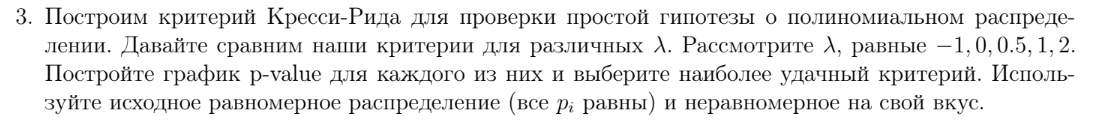

In [14]:
#статичные данные
L = [-1, 0, 0.5, 1, 2]

In [84]:
#генерация вероятностей
#n - Размер вектора
def generate(n):
    ret_val = np.zeros(n)
    ret_val[0] = np.random.uniform(0, 1/n)/2
    s = ret_val[0]
    for i in range(1, n-1):
        ret_val[i] = np.random.uniform(0, (1-s)/n)
        s += ret_val[i]
    ret_val[n-1] = 1 - s
    return ret_val


def plotting(n, k, p, l):
    pval = []
    for i in range(1000):
        sample = np.random.multinomial(n = k, pvals = p)
        pval.append(sc.stats.power_divergence(sample, f_exp = p*k, lambda_=l)[1])
    pval = np.array(pval)
    x = np.arange(0, 1, 0.001)
    pval.sort()
    plt.plot(x, pval, label=str(l))
    plt.legend(loc='best')

Размер вектора:  20
Размео выборки:  500


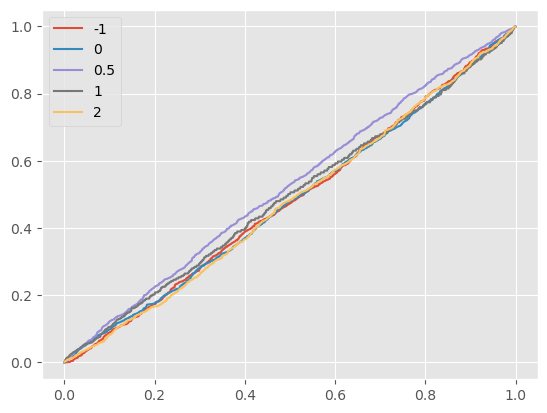

In [89]:
#a) исходное равномерное
n = int(input("Размер вектора: "))
p = [1/n]*n
p = np.array(p)
k = int(input("Размео выборки: "))

for l in L:
    plotting(n, k, p, l)

Размер вектора:  20
Размео выборки:  500


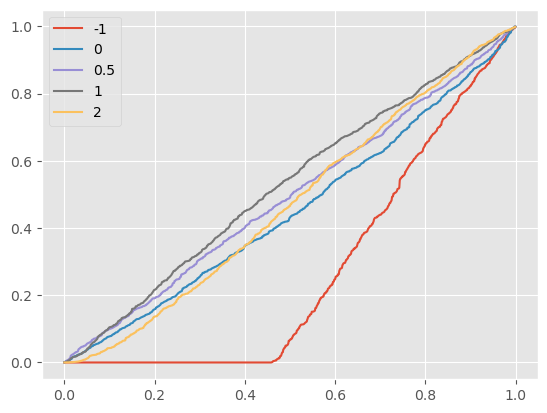

In [88]:
# б) неравномерное

n = int(input("Размер вектора: "))
p = generate(n)
p = np.array(p)
k = int(input("Размео выборки: "))

for l in L:
    plotting(n, k, p, l)